In [1]:
import pytesseract
import cv2
import matplotlib.pyplot as plt
import re

from pytesseract import Output

In [119]:
image_path = 'images/24.jpg'
image = cv2.imread(image_path)

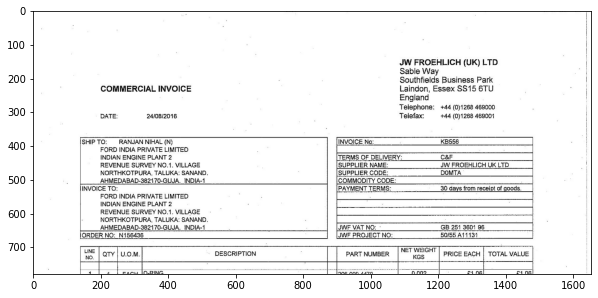

In [120]:
top_image = image[0:image.shape[0]//3,:]

plt.figure(figsize=(10,10))
plt.imshow(top_image)

In [121]:
text_data = pytesseract.image_to_data(top_image, output_type=Output.DICT)
text_data.keys()

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])

In [122]:
invoice_indexes = []

for i, txt in enumerate(text_data['text']):
    if 'invoice' in txt.lower():
        invoice_indexes.append(i)

172 21 1654 439
0 319 1654 733
706 180 1654 594


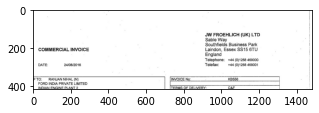

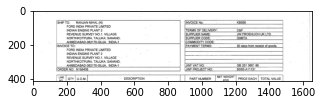

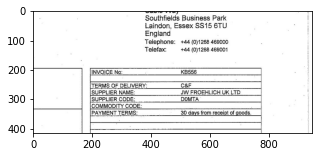

In [123]:
txt_range = 200

invoice_crops = []
for invoice_ind in invoice_indexes:
    x1 = max(text_data['left'][invoice_ind] - txt_range, 0)
    y1 = max(text_data['top'][invoice_ind] - txt_range, 0)
#     x2 = text_data['width'][invoice_ind] + text_data['left'][invoice_ind] + image.shape[1]
    x2 = image.shape[1]
    y2 = text_data['height'][invoice_ind] + text_data['top'][invoice_ind] + txt_range

    print(x1, y1, x2, y2)

    invoice_crop = image[y1:y2, x1:x2]
    invoice_crops.append(invoice_crop)

    plt.figure(figsize=(5,5))
    plt.imshow(invoice_crop)

In [124]:
texts = []
for invoice_crop in invoice_crops:
    text = pytesseract.image_to_string(invoice_crop)
    texts.append(text)

In [125]:
date_patterns = ['\d{2}[\/\.\-][[\d{2}\w]+[\/\.\-]\d{4}', 
                 '\d{4}[\/\.\-][[\d{2}\w]+[\/\.\-]\d{2}']
dates = []

for text in texts:
    for pattern in date_patterns:    
        date = re.findall(pattern, text)
        if date!=[]: 
            dates+=date
            break

print('Date', set(dates))

Date {'24/08/2016'}


## Invoice Number

272 121 1654 339
###############
 ['JIERCIAL INVOICE', '', '24/08/2016', '', 'JW FROEHLICH (UK) LTD', 'Sable Way', '', 'Southfields Business Park', 'Laindon, Essex $S15 6TU', 'England']
46 419 1654 633
###############
 ['INVOICE TO:', 'FORD INDIA PRIVATE LIMITED', 'INDIAN ENGINE PLANT 2', 'REVENUE SURVEY NO.1. VILLAGE', 'NORTHKOTPURA, TALUKA: SANAND.', '', ' ', '', ' ', '']
806 280 1654 494
###############
 ['INVOICE No: KBS56', 'TERMS OF DELIVER’ C&F', 'SUPPLIER NAMI JW FROEHLICH UK LTD', 'SUPPLIER CODE: DOMTA', '', ' ', '', ' ', '\x0c']


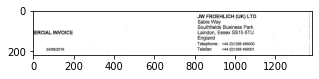

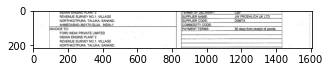

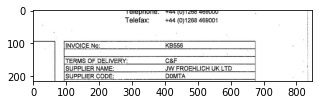

In [126]:
for invoice_ind in invoice_indexes:
    txt_range = 100

    x1 = max(text_data['left'][invoice_ind] - txt_range, 0)
    y1 = max(text_data['top'][invoice_ind] - txt_range, 0)
    # x2 = text_data['width'][invoice_ind] + text_data['left'][invoice_ind] + txt_range + 200
    x2 = image.shape[1]
    y2 = text_data['height'][invoice_ind] + text_data['top'][invoice_ind] + txt_range

    print(x1, y1, x2, y2)

    invoice_crop = image[y1:y2, x1:x2]
    invoice_crops.append(invoice_crop)

    plt.figure(figsize=(5,5))
    plt.imshow(invoice_crop)

    text = pytesseract.image_to_string(invoice_crop)
#     print(text)
    text = text.split('\n')
    for i, txt in enumerate(text):
        if 'invoice' in txt.lower():
            print('###############\n', text[i:i+10])
            break


## Amount

1149 512 1654 927
 

GB 251 3601 96

 

 

 

BO/S5 A11134
ACHT) PRICE EACH | TOTAL VALUE

02 £106
22 £86.59 £173.18

  

 

~_ £162.24
£932.66

 

 

 

 

 

['86.59', '173.18', '162.24', '932.66']
93266


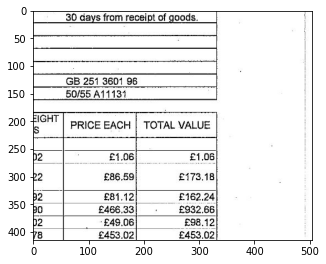

In [128]:
## Find Amount/Total keywords
amount_indexes = []

for i, txt in enumerate(text_data['text']):
    if 'total' in txt.lower() or 'amount' in txt.lower():
        amount_indexes.append(i)
        
txt_range = 200

amount_crops = []
for amount_ind in amount_indexes:
    x1 = max(text_data['left'][amount_ind] - txt_range, 0)
    y1 = max(text_data['top'][amount_ind] - txt_range, 0)
#     x2 = text_data['width'][invoice_ind] + text_data['left'][invoice_ind] + image.shape[1]
    x2 = image.shape[1]
    y2 = text_data['height'][amount_ind] + text_data['top'][amount_ind] + txt_range
    print(x1, y1, x2, y2)

    amount_crop = image[y1:y2, x1:x2]
    amount_crops.append(amount_crop)

    plt.figure(figsize=(5,5))
    plt.imshow(amount_crop)
    
texts = []
for amount_crop in amount_crops:
    text = pytesseract.image_to_string(amount_crop)
#     texts.append(text)
    print(text)
    
    amount_patterns = ['\d+[,.]\d+']
    amount = []
    for pattern in amount_patterns:    
        amnt = re.findall(pattern, text)
        if amnt!=[]: 
            amount+=amnt
            break
    print(amount)

    amounts = [int(i.replace(',','').replace('.','')) for i in amount]
    if amounts!=[]:
        final_amount = max(amounts)
        print(final_amount)

[]


Not found!
